# Research Topic : Weather

In this notebook, we will be researching the relationship between weather conditions and accident severity. We will also look at how the number of injuries has changed over time in different weather conditions.

**Hypothesis 1:** There are more serious injuries during weather conditions with low visibility.

**Hypothesis 2:** The number of injuries due to IMC weather has gone up over time due to the increased amount of air traffic in the past two decades.

## Data Grouping

First, we will start by importing necessary libraries and our data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/AviationData_clean.csv', index_col=0)

df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Aircraft.damage,Registration.Number,Make,Model,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Location_City,Location_State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,NC6404,Stinson,108-3,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Moose Creek,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,N5069P,Piper,PA24-180,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Bridgeport,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Destroyed,N5142R,Cessna,172M,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Destroyed,N1168J,Rockwell,112,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Eureka,CA
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Substantial,CF-TLU,Mcdonnell Douglas,DC9,...,Turbo Fan,Unknown,0.0,0.0,1.0,44.0,VMC,Climb,Boston,MA


Now, let's take a look at the values in the Weather Condition field.

In [4]:
df['Weather.Condition'].value_counts()

Weather.Condition
VMC    74761
IMC     5649
UNK      852
Name: count, dtype: int64

There are 3 different weather conditions:
- VMC: short for Visual Meteorological Conditions, weather conditions that allow a pilot to navigate by visual reference to the ground and other landmarks (i.e. clear weather).
- IMC: short for Instrument Meteorological Conditions, weather conditions that require a pilot to rely on flight instruments (i.e. stormy or very cloudy weather).
- UNK: short for Unknown, weather data was not present in the report.

For this report, we will only be focusing on VMC and IMC values.

Let's group the dataframe by weather condition and show the sum of the injuries columns.

In [28]:
weather_df = df[(df['Weather.Condition'] == 'IMC') | (df['Weather.Condition'] == 'VMC')]
weather_df_grouped = weather_df.groupby(['Weather.Condition'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']]
weather_df_grouped.sum()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
Weather.Condition,,,
IMC,8531.0,1700.0,2163.0
VMC,23654.0,16244.0,21888.0


From this, we can see that there were many more injuries during clear weather conditions. However, this data is skewed by the fact that there are way more data points for VMC.

To get a more accurate picture, let's look at the average number of injuries for each category.

In [51]:
weather_df_grouped.mean()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
Weather.Condition,,,
IMC,1.510179,0.300938,0.382900
VMC,0.316395,0.217279,0.292773


Looking at this, we can see that the average severe injuries are much higher during inclement weather.

Now, lets visualize these findings:

## Visualization

Let's take a look at the different injury categories filtered by weather conditions.

In [76]:
plotting_weather_df = weather_df.copy()
plotting_weather_df = plotting_weather_df[['Weather.Condition', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']]
plotting_weather_df['Weather.Condition'] = \
plotting_weather_df['Weather.Condition'].astype('category')
plotting_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80410 entries, 2 to 88767
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Weather.Condition       80410 non-null  category
 1   Total.Fatal.Injuries    80410 non-null  float64 
 2   Total.Serious.Injuries  80410 non-null  float64 
 3   Total.Minor.Injuries    80410 non-null  float64 
dtypes: category(1), float64(3)
memory usage: 2.5 MB


In [58]:
VMC_df=plotting_weather_df[plotting_weather_df['Weather.Condition'] == 'VMC'][['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']]
IMC_df=plotting_weather_df[plotting_weather_df['Weather.Condition'] == 'IMC'][['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']]

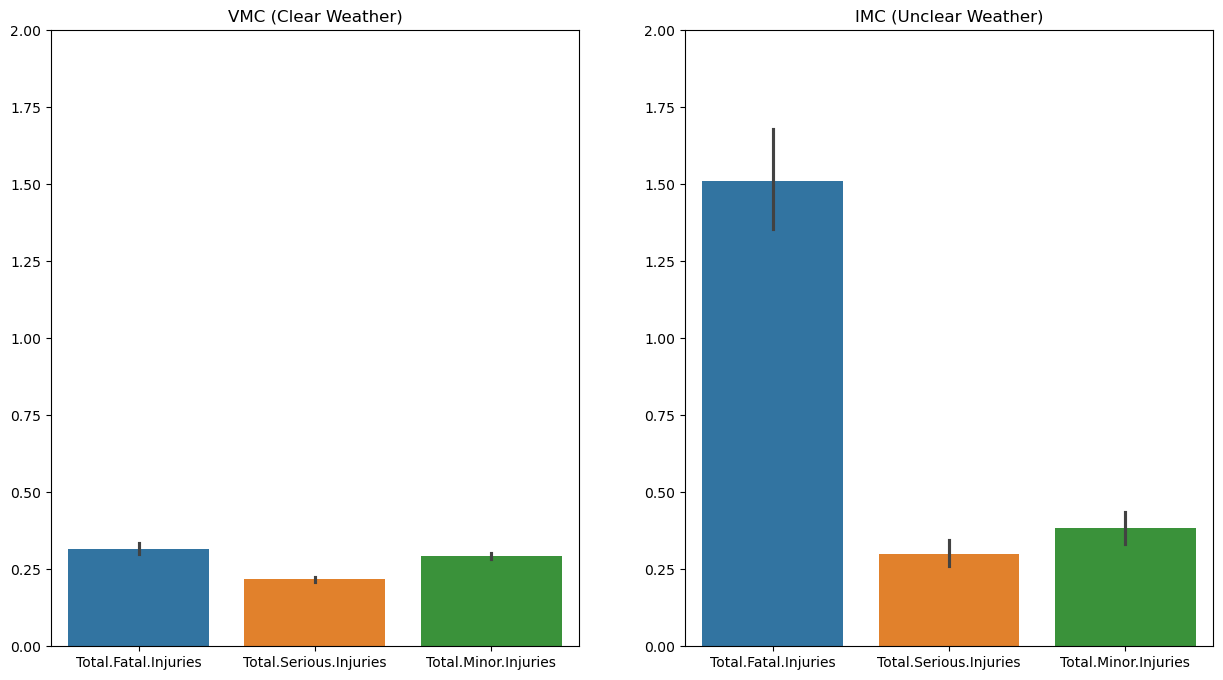

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,8))

sns.barplot(data=VMC_df, estimator='mean', ax=axes[0])
sns.barplot(data=IMC_df, estimator='mean', ax=axes[1])

axes[0].set_title('VMC (Clear Weather)')
axes[0].set_ybound(0,2)
axes[1].set_title('IMC (Unclear Weather)')
axes[1].set_ybound(0,2)

plt.show()

In [92]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81262 entries, 0 to 88767
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                81262 non-null  object        
 1   Investigation.Type      81262 non-null  object        
 2   Accident.Number         81262 non-null  object        
 3   Event.Date              81262 non-null  datetime64[ns]
 4   Location                81262 non-null  object        
 5   Country                 81043 non-null  object        
 6   Aircraft.damage         81262 non-null  object        
 7   Registration.Number     81262 non-null  object        
 8   Make                    81262 non-null  object        
 9   Model                   81262 non-null  object        
 10  Amateur.Built           81262 non-null  object        
 11  Number.of.Engines       81262 non-null  float64       
 12  Engine.Type             81262 non-null  object     

In [97]:
df.groupby(df['Event.Date'].map(lambda x: x.year))[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
Event.Date,,,
1948,2.0,0.0,0.0
1962,4.0,0.0,0.0
1974,3.0,0.0,0.0
1977,2.0,0.0,0.0
1979,0.0,0.0,1.0
1981,4.0,0.0,0.0
1982,1579.0,721.0,994.0
1983,1272.0,673.0,1048.0
1984,1227.0,697.0,1047.0


![title](img/Screenshot%202025-01-22%20at%202.36.27 PM.png)

## Conclusion

In conclusion, all three injury categories had higher average values in inclement weather as opposed to clear weather. Our business recommendation would be to avoid flying in bad weather.